In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as prep
from sklearn import datasets

In [2]:
readData = pd.read_table('Book1.csv', ',', header=None,
                        names=['ID', 'Patient', 'Age', 'Residence', 'Parity', 'Diastatus', 'Treatment', 'Fetalloss', 'OtherComplications', 'ModeofDelivery', 
                              'Liqor', 'Apgar', 'Sex', 'Babyweight', 'Gestationalage', 'Agalgasga', 'Babysymptoms', 'Cardiovascularfindings', 'Othercomplications', 'Chestxray', 'Echo', 'Followup'])
data = pd.DataFrame(readData);
print('Rows and Columns', data.shape)
data.head(5)

C:\Users\Bhushan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Rows and Columns (51, 22)


,ID,Patient,Age,Residence,Parity,Diastatus,Treatment,Fetalloss,OtherComplications,ModeofDelivery,...,Sex,Babyweight,Gestationalage,Agalgasga,Babysymptoms,Cardiovascularfindings,Othercomplications,Chestxray,Echo,Followup
0,2356,Suganthi,21,Puducherry,Multi,Gestational diabetes,Diet,Absent,No,LSCS,...,Male,3.6kg,Term,AGA,Present,Murmur,Absent,Normal,VSD,Regressed
1,2743,Ramya,23,Puducherry,primi,Gestational diabetes,Diet,Absent,No,LSCS,...,Male,3.7kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done
2,3452,Saranya,20,Puducherry,primi,Gestational diabetes,Insulin,Absent,No,Normal,...,Male,3.1kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done
3,4390,Malar,34,Puducherry,Multi,Gestational diabetes,Diet,Absent,Hypertension,Normal,...,Female,2.7kg,Term,AGA,Absent,Absent,NaN,Normal,Normal,Not done
4,4986,Mangai,32,Puducherry,Multi,Gestational diabetes,Diet,Present,No,LSCS,...,Female,3.6kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done


In [3]:
data = data.replace('?', np.NaN)
data = data.replace('\t?', np.NaN)
data.head()

,ID,Patient,Age,Residence,Parity,Diastatus,Treatment,Fetalloss,OtherComplications,ModeofDelivery,...,Sex,Babyweight,Gestationalage,Agalgasga,Babysymptoms,Cardiovascularfindings,Othercomplications,Chestxray,Echo,Followup
0,2356,Suganthi,21,Puducherry,Multi,Gestational diabetes,Diet,Absent,No,LSCS,...,Male,3.6kg,Term,AGA,Present,Murmur,Absent,Normal,VSD,Regressed
1,2743,Ramya,23,Puducherry,primi,Gestational diabetes,Diet,Absent,No,LSCS,...,Male,3.7kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done
2,3452,Saranya,20,Puducherry,primi,Gestational diabetes,Insulin,Absent,No,Normal,...,Male,3.1kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done
3,4390,Malar,34,Puducherry,Multi,Gestational diabetes,Diet,Absent,Hypertension,Normal,...,Female,2.7kg,Term,AGA,Absent,Absent,NaN,Normal,Normal,Not done
4,4986,Mangai,32,Puducherry,Multi,Gestational diabetes,Diet,Present,No,LSCS,...,Female,3.6kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done


In [4]:
missing = data.isnull().sum(axis=0)
print('Columns and Number of missing data \n', missing)

Columns and Number of missing data 
 ID                        0
Patient                   0
Age                       0
Residence                 0
Parity                    0
Diastatus                 0
Treatment                 0
Fetalloss                 0
OtherComplications        0
ModeofDelivery            0
Liqor                     0
Apgar                     0
Sex                       0
Babyweight                0
Gestationalage            0
Agalgasga                 0
Babysymptoms              0
Cardiovascularfindings    0
Othercomplications        2
Chestxray                 0
Echo                      0
Followup                  0
dtype: int64


In [5]:
Parity_mapping = {'primi':1, 'Multi':2}
data['Parity'] = data['Parity'].map(Parity_mapping)
Diastatus_mapping = {'Diabetic status not known':1, 'Pregestational diabetes':2, 'Gestational diabetes':3}
data['Diastatus'] = data['Diastatus'].map(Diastatus_mapping)
data.head()
#Diabeti status_mapping = {'Diabetic status not known':1, 'Pregestational diabetes':2, 'Gestational diabetes':3}
#data['Diabetic status'] = data['Diabetic status'].map(Diabetic status_mapping)

,ID,Patient,Age,Residence,Parity,Diastatus,Treatment,Fetalloss,OtherComplications,ModeofDelivery,...,Sex,Babyweight,Gestationalage,Agalgasga,Babysymptoms,Cardiovascularfindings,Othercomplications,Chestxray,Echo,Followup
0,2356,Suganthi,21,Puducherry,2,3,Diet,Absent,No,LSCS,...,Male,3.6kg,Term,AGA,Present,Murmur,Absent,Normal,VSD,Regressed
1,2743,Ramya,23,Puducherry,1,3,Diet,Absent,No,LSCS,...,Male,3.7kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done
2,3452,Saranya,20,Puducherry,1,3,Insulin,Absent,No,Normal,...,Male,3.1kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done
3,4390,Malar,34,Puducherry,2,3,Diet,Absent,Hypertension,Normal,...,Female,2.7kg,Term,AGA,Absent,Absent,NaN,Normal,Normal,Not done
4,4986,Mangai,32,Puducherry,2,3,Diet,Present,No,LSCS,...,Female,3.6kg,Term,AGA,Absent,Absent,Absent,Normal,Normal,Not done


In [6]:
Diastatus_mappinj = {'Diabetic status not known':1, 'Gestational diabetes':3, 'Pregestational diabetes':2}
data.replace(Diastatus_mapping, inplace=True)
data['Diastatus'] = data.Diastatus.astype(float)
data['Diastatus'].fillna((data['Diastatus'].mean()),inplace=True)
data['Diastatus'] = data.Diastatus.astype(int)

Treatment_mapping = {'No treatment':1, 'Diet':2, 'Insulin':3, 'OHA':4}
data.replace(Treatment_mapping, inplace=True)
data['Treatment'] = data.Treatment.astype(float)
data['Treatment'].fillna((data['Treatment'].mean()),inplace=True)
data['Treatment'] = data.Treatment.astype(int)

Fetalloss_mapping = {'Present': 1, 'Absent': 2}
data.replace(Fetalloss_mapping, inplace=True)
data['Fetalloss'] = data.Fetalloss.astype(float)
data['Fetalloss'].fillna((data['Fetalloss'].mean()),inplace=True)
data['Fetalloss'] = data.Fetalloss.astype(int)

Babysymptoms_mapping = {'Absent':1, 'Present':2, 'Respiratory distress':3}
data.replace(Babysymptoms_mapping, inplace=True)
data['Babysymptoms'] = data.Babysymptoms.astype(float)
data['Babysymptoms'].fillna((data['Babysymptoms'].mean()),inplace=True)
data['Babysymptoms'] = data.Babysymptoms.astype(int)

Cardiovascularfindings_mapping = {'Absent':1, 'Murmur':2}
data.replace(Cardiovascularfindings_mapping, inplace=True)
data['Cardiovascularfindings'] = data.Cardiovascularfindings.astype(float)
data['Cardiovascularfindings'].fillna((data['Cardiovascularfindings'].mean()),inplace=True)
data['Cardiovascularfindings'] = data.Cardiovascularfindings.astype(int)
                                      
Chestxray_mapping = {'Normal':1, 'Cardiomegaly':2}
data.replace(Chestxray_mapping, inplace=True)
data['Chestxray'] = data.Chestxray.astype(float)
data['Chestxray'].fillna((data['Chestxray'].mean()),inplace=True)
data['Chestxray'] = data.Chestxray.astype(int)

Echo_mapping = {'Normal':1, 'ASD':2, 'ASD/Dialated RA,RV':3, 'ASH':4, 'PDA':5, 'PDA/PAH':6, 'VSD':7, 'VSD/PAH':8}
data.replace(Echo_mapping, inplace=True)
data['Echo'] = data.Echo.astype(float)
data['Echo'].fillna((data['Echo'].mean()), inplace=True)
data['Echo'] = data.Echo.astype(int)

Followup_mapping = {'lost follow up':1, 'Not done':2, 'died':3, 'Regressed':4}
data.replace(Followup_mapping, inplace=True)
data['Followup'] = data.Followup.astype(float)
data['Followup'].fillna((data['Followup'].mean()), inplace=True)
data['Followup'] = data.Followup.astype(int)

data.head(10)

,ID,Patient,Age,Residence,Parity,Diastatus,Treatment,Fetalloss,OtherComplications,ModeofDelivery,...,Sex,Babyweight,Gestationalage,Agalgasga,Babysymptoms,Cardiovascularfindings,Othercomplications,Chestxray,Echo,Followup
0,2356,Suganthi,21,Puducherry,2,3,2,2,No,LSCS,...,Male,3.6kg,Term,AGA,1,2,2,1,7,4
1,2743,Ramya,23,Puducherry,1,3,2,2,No,LSCS,...,Male,3.7kg,Term,AGA,2,2,2,1,1,2
2,3452,Saranya,20,Puducherry,1,3,3,2,No,1,...,Male,3.1kg,Term,AGA,2,2,2,1,1,2
3,4390,Malar,34,Puducherry,2,3,2,2,Hypertension,1,...,Female,2.7kg,Term,AGA,2,2,NaN,1,1,2
4,4986,Mangai,32,Puducherry,2,3,2,1,No,LSCS,...,Female,3.6kg,Term,AGA,2,2,2,1,1,2
5,5423,Selvi,21,Puducherry,2,3,2,1,No,LSCS,...,Female,3.4kg,Term,AGA,2,2,2,1,1,2
6,5743,Rosemary,34,Puducherry,1,3,2,2,No,LSCS,...,Male,3.5kg,Term,AGA,1,2,2,1,5,4
7,6453,Nagamani,32,Puducherry,2,3,2,2,Anemia,1,...,Male,2.9kg,Term,AGA,2,2,2,1,5,1
8,6634,Deepa,24,Puducherry,1,3,2,2,No,LSCS,...,Male,3.2kg,Term,AGA,2,2,2,1,1,2
9,6801,Lakshmi,28,Puducherry,2,3,3,2,No,LSCS,...,Female,3.6kg,Term,AGA,2,2,2,1,5,2


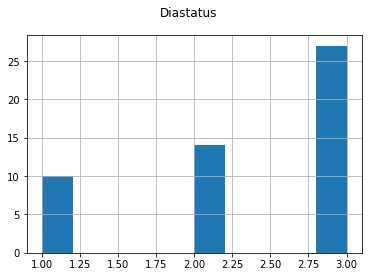

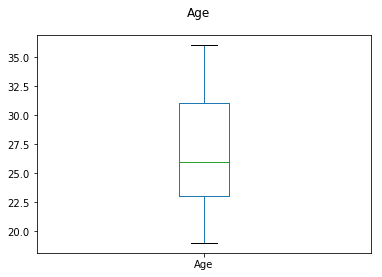

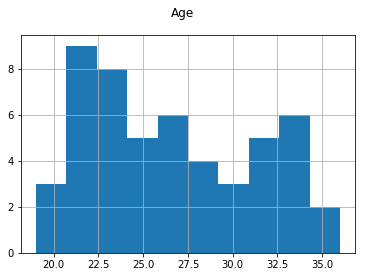

In [7]:
data['Diastatus'].hist(grid=True)
plt.suptitle('Diastatus')
plt.show()

data['Age'].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.suptitle('Age')
plt.show()

data['Age'].hist(grid=True)
plt.suptitle('Age')
plt.show()

In [8]:
del data['ID']
del data['Patient']
del data['Age']
del data['Residence']
del data['OtherComplications']
del data['ModeofDelivery']
del data['Liqor']
del data['Apgar']
del data['Sex']
del data['Babyweight']
del data['Gestationalage']
del data['Agalgasga']
del data['Othercomplications']

In [9]:
data.shape
data.head(20)

,Parity,Diastatus,Treatment,Fetalloss,Babysymptoms,Cardiovascularfindings,Chestxray,Echo,Followup
0,2,3,2,2,1,2,1,7,4
1,1,3,2,2,2,2,1,1,2
2,1,3,3,2,2,2,1,1,2
3,2,3,2,2,2,2,1,1,2
4,2,3,2,1,2,2,1,1,2
5,2,3,2,1,2,2,1,1,2
6,1,3,2,2,1,2,1,5,4
7,2,3,2,2,2,2,1,5,1
8,1,3,2,2,2,2,1,1,2
9,2,3,3,2,2,2,1,5,2


In [10]:
data.to_csv('Data_Gestational_Diabetes',sep='\t')

In [42]:
num_obs = len(data)
num_DSN = len(data.loc[data['Diastatus'] == 1.0])
num_PD = len(data.loc[data['Diastatus'] == 2.0])
num_GD = len(data.loc[data['Diastatus'] == 3.0])
print('Number of DSN cases: {0} ({1:2.2f}%)'.format(num_DSN,(num_DSN/num_obs) * 100))
print('Number of PD cases: {0} ({1:2.2f}%)'.format(num_PD,(num_PD/num_obs) * 100))
print('Number of GD cases: {0} ({1:2.2f}%)'.format(num_GD,(num_GD/num_obs) * 100))

Number of DSN cases: 10 (19.61%)
Number of PD cases: 14 (27.45%)
Number of GD cases: 27 (52.94%)


In [78]:
from sklearn.model_selection import train_test_split
feature_col_names = ['Parity','Treatment','Cardiovascularfindings','Fetalloss','Babysymptoms','Chestxray','Echo','Followup']
predicted_class_names = ['Diastatus']
X = data[feature_col_names].values
Y = data[predicted_class_names].values
split_test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=split_test_size, random_state=5)

In [79]:
print('{0:0.2f}% in training set'.format((len(X_train)/len(data.index)) * 100))
print('{0:0.2f}% in test set'.format((len(X_test)/len(data.index)) * 100))

68.63% in training set
31.37% in test set


In [65]:
print('Original DSN : {0} ({1:0.2f})'.format(len(data.loc[data['Diastatus']==1]), (len(data.loc[data['Diastatus']==1])/len(data.index))* 100.0))
print('Original PD : {0} ({1:0.2f})'.format(len(data.loc[data['Diastatus']==2]), (len(data.loc[data['Diastatus']==2])/len(data.index))* 100.0))
print('Original GD : {0} ({1:0.2f})'.format(len(data.loc[data['Diastatus']==3]), (len(data.loc[data['Diastatus']==3])/len(data.index))* 100.0))
print('')
print('Training DSN : {0} ({1:.2f}%)'.format(len(Y_train[Y_train[:]==1]),(len(Y_train[Y_train[:]==1])/len(Y_train)*100.0)))
print('Training PD : {0} ({1:.2f}%)'.format(len(Y_train[Y_train[:]==2]),(len(Y_train[Y_train[:]==2])/len(Y_train)*100.0)))
print('Training GD : {0} ({1:.2f}%)'.format(len(Y_train[Y_train[:]==3]),(len(Y_train[Y_train[:]==3])/len(Y_train)*100.0)))
print('')
print('Test DSN  :{0} ({1:0.2f}%)'.format(len(Y_test[Y_test[:]==1]), (len(Y_test[Y_test[:]==1])/len(Y_test)*100.0)))
print('Test PD  :{0} ({1:0.2f}%)'.format(len(Y_test[Y_test[:]==2]), (len(Y_test[Y_test[:]==2])/len(Y_test)*100.0)))
print('Test GD  :{0} ({1:0.2f}%)'.format(len(Y_test[Y_test[:]==3]), (len(Y_test[Y_test[:]==3])/len(Y_test)*100.0)))
print('')

Original DSN : 10 (19.61)
Original PD : 14 (27.45)
Original GD : 27 (52.94)

Training DSN : 8 (22.86%)
Training PD : 10 (28.57%)
Training GD : 17 (48.57%)

Test DSN  :2 (12.50%)
Test PD  :4 (25.00%)
Test GD  :10 (62.50%)



In [66]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
nb_predict_test = nb_model.predict(X_test)
from sklearn import metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(Y_test,nb_predict_test)))

Accuracy: 0.8750


In [68]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [69]:
nb_predict_test = nb_model.predict(X_test)
from sklearn import metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(Y_test,nb_predict_test)))

Accuracy: 0.6250


In [70]:
# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_train, Y_train.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [71]:
nb_predict_test = nb_model.predict(X_test)
from sklearn import metrics
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(Y_test,nb_predict_test)))

Accuracy: 0.6250


In [72]:
# Confusion Matrix
print('Confusion Matrix')
print('{0}'.format(metrics.confusion_matrix(Y_test, nb_predict_test)))
print('')

print('Classification Report')
print(metrics.classification_report(Y_test, nb_predict_test))

Confusion Matrix
[[ 0  0  2]
 [ 0  0  4]
 [ 0  0 10]]

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         4
           3       0.62      1.00      0.77        10

   micro avg       0.62      0.62      0.62        16
   macro avg       0.21      0.33      0.26        16
weighted avg       0.39      0.62      0.48        16



C:\Users\Bhushan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, Y_train.ravel())

C:\Users\Bhushan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [74]:
rf_predict_train = rf_model.predict(X_train)
print('Accuracy: {0:.4f}'.format(metrics.accuracy_score(Y_train, rf_predict_train)))

Accuracy: 0.9429


In [75]:
rf_predict_test = rf_model.predict(X_test)
print('Accuracy: {0: .4f}'.format(metrics.accuracy_score(Y_test, rf_predict_test)))

Accuracy:  0.8750


In [76]:
print(metrics.confusion_matrix(Y_test, rf_predict_test))
print('')
print('Classification Report')
print(metrics.classification_report(Y_test, rf_predict_test))

[[2 0 0]
 [0 4 0]
 [0 2 8]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         4
           3       1.00      0.80      0.89        10

   micro avg       0.88      0.88      0.88        16
   macro avg       0.89      0.93      0.90        16
weighted avg       0.92      0.88      0.88        16



In [77]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X,Y)
print('Training Accuracy {}'.format(model.score(X,Y)))
print('Testing Accuracy {}'.format(model.score(X_test,Y_test)))

Training Accuracy 0.9411764705882353
Testing Accuracy 0.9375


C:\Users\Bhushan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bhushan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
